## Using the smopy package to plot places and paths on maps

The smopy package allows you to create maps based upon OpenStreetMap images. https://github.com/rossant/smopy

These can be converted to matplotlib objects, where you can draw points or paths on them.

Smopy has built in methods to allow you to specify positions in latitude and longitude.

To create a map, you need to specify a "tile library"  - i.e. the source and style of the map you want, and then the region by specifying a window of latitude / longitude and a zoom level.

See https://wiki.openstreetmap.org/wiki/Tile_servers for a range of different styles. 

To avoid downloading the same map multiple times every time you redraw other data, it can be a good idea to define the map object in a separate cell. 

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import smopy

#smopy tile server and basic options
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
smopy.TILE_SIZE = 512

In [154]:
# generate world map ((lat_min, long_min, lat_max, long_max) , z=zoom_level)
# play with the values here to view different areas -- note that the zoom level may be changed to something more appropriate
worldmap = smopy.Map((0, -120, 65, 120), z=2)

#greater dublin
#dublinmap = smopy.Map((53.25, -6.4, 53.45, -6.15), z=11)

In [152]:
# there is a built in method for displaying a map in a notebook
#worldmap.show_ipython()

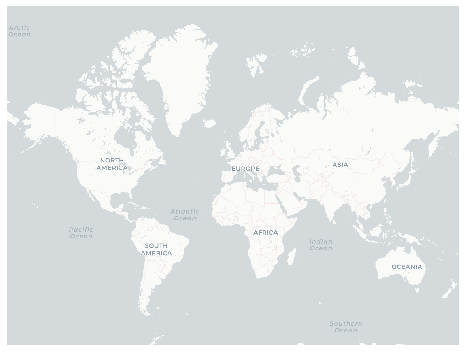

In [155]:
# To create a smopy map inside a matplotlib object:
plot1, ax = plt.subplots(figsize=(8, 5))
ax = plt.subplot(111)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.set_xlim(0, worldmap.w)
ax.set_ylim(worldmap.h, 0)
ax.axis('off')
plt.tight_layout()
ax.imshow(worldmap.img)
plt.show(plot1)

The smopy method 

        map.to_pixels(latitude, longitude)
        
can be used to draw points on a map by specifying their latitude and longitude.

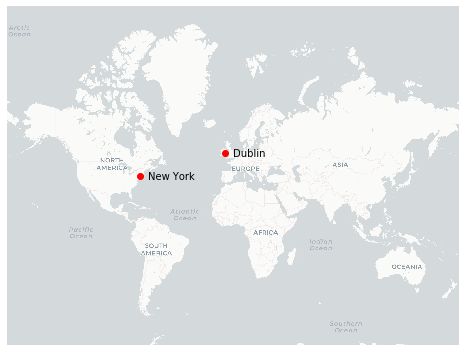

In [157]:
lats=[53.3498, 40.7128]
lons=[-6.2603, -74.0060]
names=['Dublin', 'New York']

px, py = [], []
for i in range(len(lats)):
    plotx, ploty = worldmap.to_pixels(lats[i], lons[i])
    px.append(plotx)
    py.append(ploty)

plot1, ax = plt.subplots(figsize=(8, 5))
ax = plt.subplot(111)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.set_xlim(0, worldmap.w)
ax.set_ylim(worldmap.h, 0)
ax.axis('off')
plt.tight_layout()
ax.imshow(worldmap.img)

#plot points for each city
ax.plot(px, py, 'ro')

#include labels
[ax.annotate(names[i], xy=(px[i], py[i]), xytext=(px[i]+36, py[i]+15), color='k', size=10) for i in range(0, len(names))]


plt.show(plot1)



### Great circular paths
Connecting two points by drawing the shorted path between them _on the globe_ requires a bit of trigonometry...

See http://movable-type.co.uk/scripts/latlong.html for more details



In [158]:
# The length of the shortest path between a and b
def gcd(alat, alon, blat, blon):
    lat1 = np.radians(alat)
    lat2 = np.radians(blat)
    lon1 = np.radians(alon)
    lon2 = np.radians(blon)

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 

    hav = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2 
    c = 2 * np.arctan2( np.sqrt(hav), np.sqrt(1-hav) ) 
    return 6371* c 



# A function that returns "num" points on the shortest path between a and b
def gcd_path(alat, alon, blat, blon, num):
    lat1 = np.radians(alat)
    lat2 = np.radians(blat)
    lon1 = np.radians(alon)
    lon2 = np.radians(blon)

    d=gcd(alat, alon, blat, blon)
    f= np.linspace(0, 1, num)

    delta = d / 6371
    alpha = np.sin((1-f)*delta) / np.sin(delta)
    beta = np.sin(f*delta) / np.sin(delta)

    x = alpha * np.cos(lat1) * np.cos(lon1) + beta * np.cos(lat2) * np.cos(lon2)
    y = alpha * np.cos(lat1) * np.sin(lon1) + beta * np.cos(lat2) * np.sin(lon2)
    z = alpha * np.sin(lat1) + beta * np.sin(lat2)

    newlats = (np.arctan2(z, np.sqrt(x**2 + y**2)))
    newlons = (np.arctan2(y, x))
    return np.degrees(newlats), (np.degrees(newlons) +540)%360 -180

In [160]:
# Generate path, e.g. list of points, and convert to pixel coordinates
path_lat, path_lon = gcd_path(lats[0], lons[0], lats[1], lons[1], 30)

p1x, p1y = [], []

for pt in range(len(path_lat)):   
        plotx, ploty = worldmap.to_pixels(path_lat, path_lon)
        p1x.append(plotx)
        p1y.append(ploty)

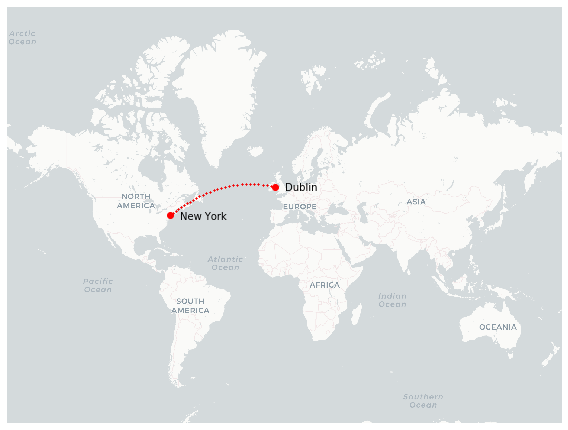

In [162]:
plot1, ax = plt.subplots(figsize=(8, 7))
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.set_xlim(0, worldmap.w)
ax.set_ylim(worldmap.h, 0)
ax.axis('off')
plt.tight_layout()
ax.imshow(worldmap.img)

#plot points for each city
ax.plot(px, py, 'ro')

#plot great circular path
ax.plot(p1x, p1y, 'or', ms=0.4, alpha=0.3)

#include labels
[ax.annotate(names[i], xy=(px[i], py[i]), xytext=(px[i]+36, py[i]+15), color='k', size=10) for i in range(0, len(names))]

plt.show(plot1)
